## Linear classification

In [222]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
# get only the first 2 attributes
X,y=iris.data[:,:2],iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print (X_train[0],y_train[0],"\n",X_train.shape, y_train.shape)

iris.feature_names

[5.  2.3] 1 
 (112, 2) (112,)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [252]:
#X_train

## Standardization
#### Standardize the features. Does not change the distribution, bt avoid features with extreme values, which may weight too much on the final results

In [224]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized=scaler.transform(X_train)
X_test_standardized=scaler.transform(X_test)

for _ in range (10):
    print(X_train[_],X_train_standardized[_])

[5.  2.3] [-0.91090798 -1.59775374]
[4.9 3.1] [-1.0271058   0.08448757]
[6.3 2.3] [ 0.59966379 -1.59775374]
[5.8 2.6] [ 0.01867465 -0.96691325]
[6.2 2.9] [ 0.48346596 -0.33607276]
[4.7 3.2] [-1.25950146  0.29476773]
[4.6 3.4] [-1.37569929  0.71532806]
[5.1 2.5] [-0.79471015 -1.17719341]
[4.8 3.4] [-1.14330363  0.71532806]
[7.9 3.8] [2.45882905 1.55644871]


## Visualize the data

In [225]:
import matplotlib.pyplot as plt

def plot_iris_w_two_features(X_train_standardized, x_label,y_label):
    colors=['red','yellow','blue']
    for species in range(len(colors)):
        sepal_length=X_train_standardized[:,0][y_train==species]
        sepal_width=X_train_standardized[:,1][y_train==species]
        plt.scatter(sepal_length,sepal_width,c=colors[species])

    plt.legend(iris.target_names)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


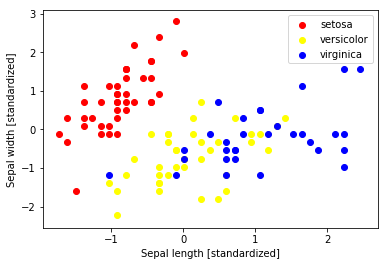

In [226]:
plot_iris_w_two_features(X_train_standardized, 'Sepal length [standardized]','Sepal width [standardized]')

## Stochastic gradient descent 
#### To find a boundary line/ hyperplane by minimizing the loss function. Evey feature classification decision depends on one hyperplane.

In [227]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier()
clf.fit(X_train_standardized,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

#### If print out the coefficient, it will have 3 values rather than one. Because the classifier converts the 3-class binary problem into 3 binary problems - separate each class from the rest 2 classes. 
#### It should also have 3 intercept values for the 3 solutions.

In [228]:
print(clf.coef_)
print(clf.intercept_)

[[-27.81699134  15.10190396]
 [ -8.19869218 -14.83695827]
 [ 15.65204872  -2.69762878]]
[-18.52562302  -2.62233293  -3.89663006]


## Visualize result hyperplanes

In [229]:
def visualize(X_train):
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() +.5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() +.5
    xs = np.arange(x_min, x_max, 0.5)
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(10, 6)
    for i in [0, 1, 2]:
        axes[i].set_aspect('equal')
        axes[i].set_title('Class '+ str(i) + ' versus the rest')
        axes[i].set_xlabel('Sepal length')
        axes[i].set_ylabel('Sepal width')
        axes[i].set_xlim(x_min, x_max) 
        axes[i].set_ylim(y_min, y_max)
        plt.sca(axes[i])
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=plt.cm.prism)
        ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
        plt.plot(xs, ys)

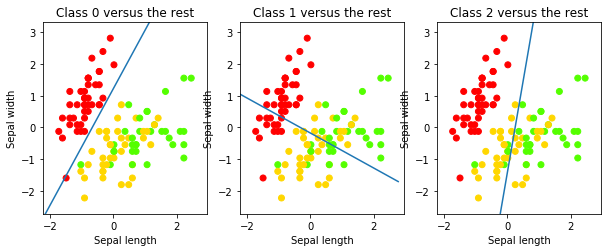

In [230]:
visualize(X_train_standardized)

## Predict using this classifier


Text(0, 0.5, 'Sepal width [cm]')

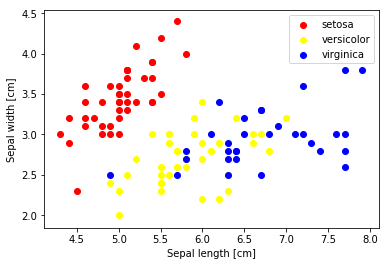

In [231]:
for species in range(len(colors)):
    sepal_length=X_train[:,0][y_train==species]
    sepal_width=X_train[:,1][y_train==species]
    plt.scatter(sepal_length,sepal_width,c=colors[species])

plt.legend(iris.target_names)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')

In [232]:
def predict_point(point):
    predicted_class=clf.predict(scaler.transform(point))
    color=colors[predicted_class[0]]
    print(color)
    
# point(8,4) should be blue
this_should_be_blue = [[8,4]]
# point(5,4.5) should be red
this_should_be_red = [[5,4.5]]

predict_point(this_should_be_blue)
predict_point(this_should_be_red)


blue
red


## Evaluate the classifier

In [233]:
from sklearn import metrics
y_train_prediction = clf.predict(X_train_standardized)
print(y_train_prediction)
print(y_train)
metrics.accuracy_score(y_train,y_train_prediction)


[1 0 1 1 2 0 0 1 0 2 0 0 1 2 0 2 1 2 1 2 0 1 2 0 0 2 2 1 2 2 2 1 0 0 2 1 0
 1 2 2 2 0 2 0 1 0 2 2 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 2 1 1 1 0 2 1 2 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 2 0 1 1 0 2 1 2 1 2 0 2 0 0 0 1 2 2 1 1 1 2
 0]
[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]


0.8214285714285714

#### It's easy to see that the classifier has some difficulty in differentiating category 1 and 2, as what we can observe from the graphs.

## Now test on the test dataset:

In [234]:
y_test_prediction = clf.predict(X_test_standardized)
print(y_test_prediction)
print(y_test)
metrics.accuracy_score(y_test,y_test_prediction)

[1 2 0 2 1 2 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 2 0 1 2 2 2 2 2 1 2 1 2 2 2 1
 1]
[1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2 1 1 2 2 2 2 2
 1]


0.6842105263157895

#### A pretty bad job at predicting. And the main prediction mistake happens between prediction class 1 and 2. 

### Ways of evaluation
#### Precision: #correct(positive) / #total positive
#### Recall: #correct(positive) / #(correct(positive) + false(negative))
The precision is the proportion of relevant documents in the list of all returned documents. The recall is the ratio of the relevant documents returned by the search engine to the total number of the relevant documents that could have been returned.

Precision can be used when solving a spam problem. People have more tolerance in not spamming junk mails than in spamming important emails. 
#### F1-score:  2\*precision\*recall/(precision+recall)
Tries to combine precision and recall

In [235]:
print(metrics.classification_report(y_test,y_test_prediction,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.43      0.27      0.33        11
   virginica       0.65      0.79      0.71        19

   micro avg       0.68      0.68      0.68        38
   macro avg       0.69      0.69      0.68        38
weighted avg       0.66      0.68      0.66        38



### The confusion metrics
Useful when accessing multi-class classification.
In its (i,j) cell, it shows the number of instances i that were predicted to be in class j.

In [241]:
confusion_metrics = metrics.confusion_matrix(y_test,y_test_prediction)
print(confusion_metrics)

[[ 8  0  0]
 [ 0  3  8]
 [ 0  4 15]]


## Cross-validation
#### Divides the dataset into several ones and build a model on each of them to avoid 'bias.'

In [269]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_model',SGDClassifier())
])

# use 5 folds
cross_validation = KFold( 5, shuffle=True, random_state=33)
scores = cross_val_score(clf, X, y, cv=cross_validation)
print(scores)

[0.73333333 0.76666667 0.73333333 0.86666667 0.8       ]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

#### Calculate the mean and SE

In [275]:
from scipy.stats import sem
print("Mean: ",np.mean(scores),"\nStandard Error: ",sem(scores))


Mean:  0.78 
Standard Error:  0.024944382578492956





# ==============================================================




### If we have chosen the petal length and the petal width to be the feature

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[1 1 0 1 1 2 0 0 2 2 2 0 2 1 2 1 2 0 2 2 0 0 2 0 1 2 1 1 2 2 1 1 2 2 2 2 2
 1]
[1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2 1 1 2 2 2 2 2
 1]
accuracy:  0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.83      0.91      0.87        11
   virginica       0.94      0.89      0.92        19

   micro avg       0.92      0.92      0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2 17]]


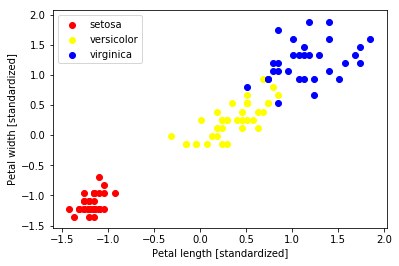

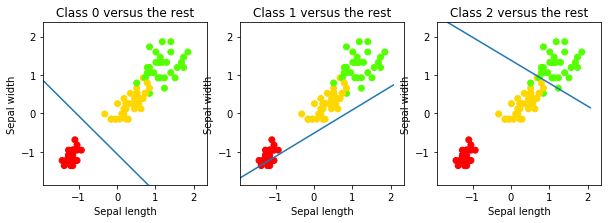

In [242]:
X_new,y_new=iris.data[:,2:4],iris.target
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=33)

scaler_new = preprocessing.StandardScaler().fit(X_train_new)
X_train_standardized_new=scaler_new.transform(X_train_new)
X_test_standardized_new=scaler_new.transform(X_test_new)

plot_iris_w_two_features(X_train_standardized_new, 'Petal length [standardized]','Petal width [standardized]')
clf.fit(X_train_standardized_new,y_train_new)
visualize(X_train_standardized_new)

y_test_prediction_new= clf.predict(X_test_standardized_new)
print(y_test_prediction_new)
print(y_test_new)
print("accuracy: ",metrics.accuracy_score(y_test_new,y_test_prediction_new))
print(metrics.classification_report(y_test_new,y_test_prediction_new,target_names=iris.target_names))

confusion_metrics = metrics.confusion_matrix(y_test_new,y_test_prediction_new)
print(confusion_metrics)


#### The classifier cannot find a way to separate class 1 with other 2 classes using only one line. But it knows clearer than when using sepal lengths as features about how to differentiate class 0 and class 2 from other classes. So overall this new classifier does a better job than the previous one. For the confusion metrics, we can see that only 3 out of total were predicted wrong.


In [278]:
clf_new = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_model',SGDClassifier())
])

# use 5 folds
cross_validation = KFold( 5, shuffle=True, random_state=33)
scores = cross_val_score(clf, iris.data[:,2:4], y, cv=cross_validation)
print(scores)

[0.9        0.96666667 0.93333333 1.         0.73333333]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [279]:
print(np.mean(scores))
print(sem(scores))

0.9066666666666666
0.04642796092394707
